C:\Users\xiaok\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in square


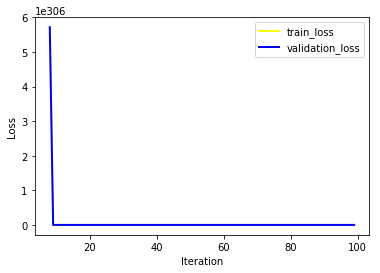

In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def get_data():
    data = load_svmlight_file('australian_scale')
    return data[0],data[1]

X , Y = get_data()

X_train,X_validation,Y_train,Y_validation = train_test_split(X , Y , test_size = 0.33)

X_train = X_train.todense()
X_validation = X_validation.todense()

Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_validation = Y_validation.reshape(Y_validation.shape[0],1)

m , n = np.shape(X_train)
b = np.zeros((X_train.shape[0],1))
w = np.empty((X_train.shape[1],1))

def compute_loss(x,y):
    n = x.shape[1]
    total = 0
    for z in range(x.shape[0]):
        if np.sum((1 - y[z] * (x[z] * w + b[z]))) > 0:
            total += np.sum((1 - y[z] * (x[z] * w + b[z])))
    loss = np.sum(np.square(w)) / (2*n) + C * total
    #print(loss)
    return loss

iteration = 100
learning_rate = 0.05
C = 0.01
train_loss=[]
validation_loss=[]

for i in range(iteration):
    for j in range(X_train.shape[0]):
        if np.sum((1 - Y[j] * (X[j] * w + b[j] ))) > 0:
            w_gradient = w + C * (-1 * Y_train[j] * X_train[j]).T
            b_gradient = -1 * C * Y_train[j]
        else:
            w_gradient = w
            b_gradient = 0
        w = w - learning_rate * w_gradient
        b[j] = b[j] - learning_rate * b_gradient
    train_loss.append( compute_loss(X_train,Y_train) )
    validation_loss.append( compute_loss(X_validation,Y_validation) )

a = np.arange(0,iteration,1)
plt.plot(a,train_loss,label = "train_loss",color = "yellow",linewidth = 2)
plt.plot(a,validation_loss,label = 'validation_loss',color = 'blue',linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()